### Synopsis
This code plots the averaged SA-XPCS results for the temperature ramping (up and down).   
Need to run the analysis code to generate the `checkpoint.pickle` file prior to running the figure rendering code

In [1]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import matplotlib.ticker as ticker


### Figure rendering

/tmp/ipykernel_2216791/4008269903.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), ha='left', x=-0.08)


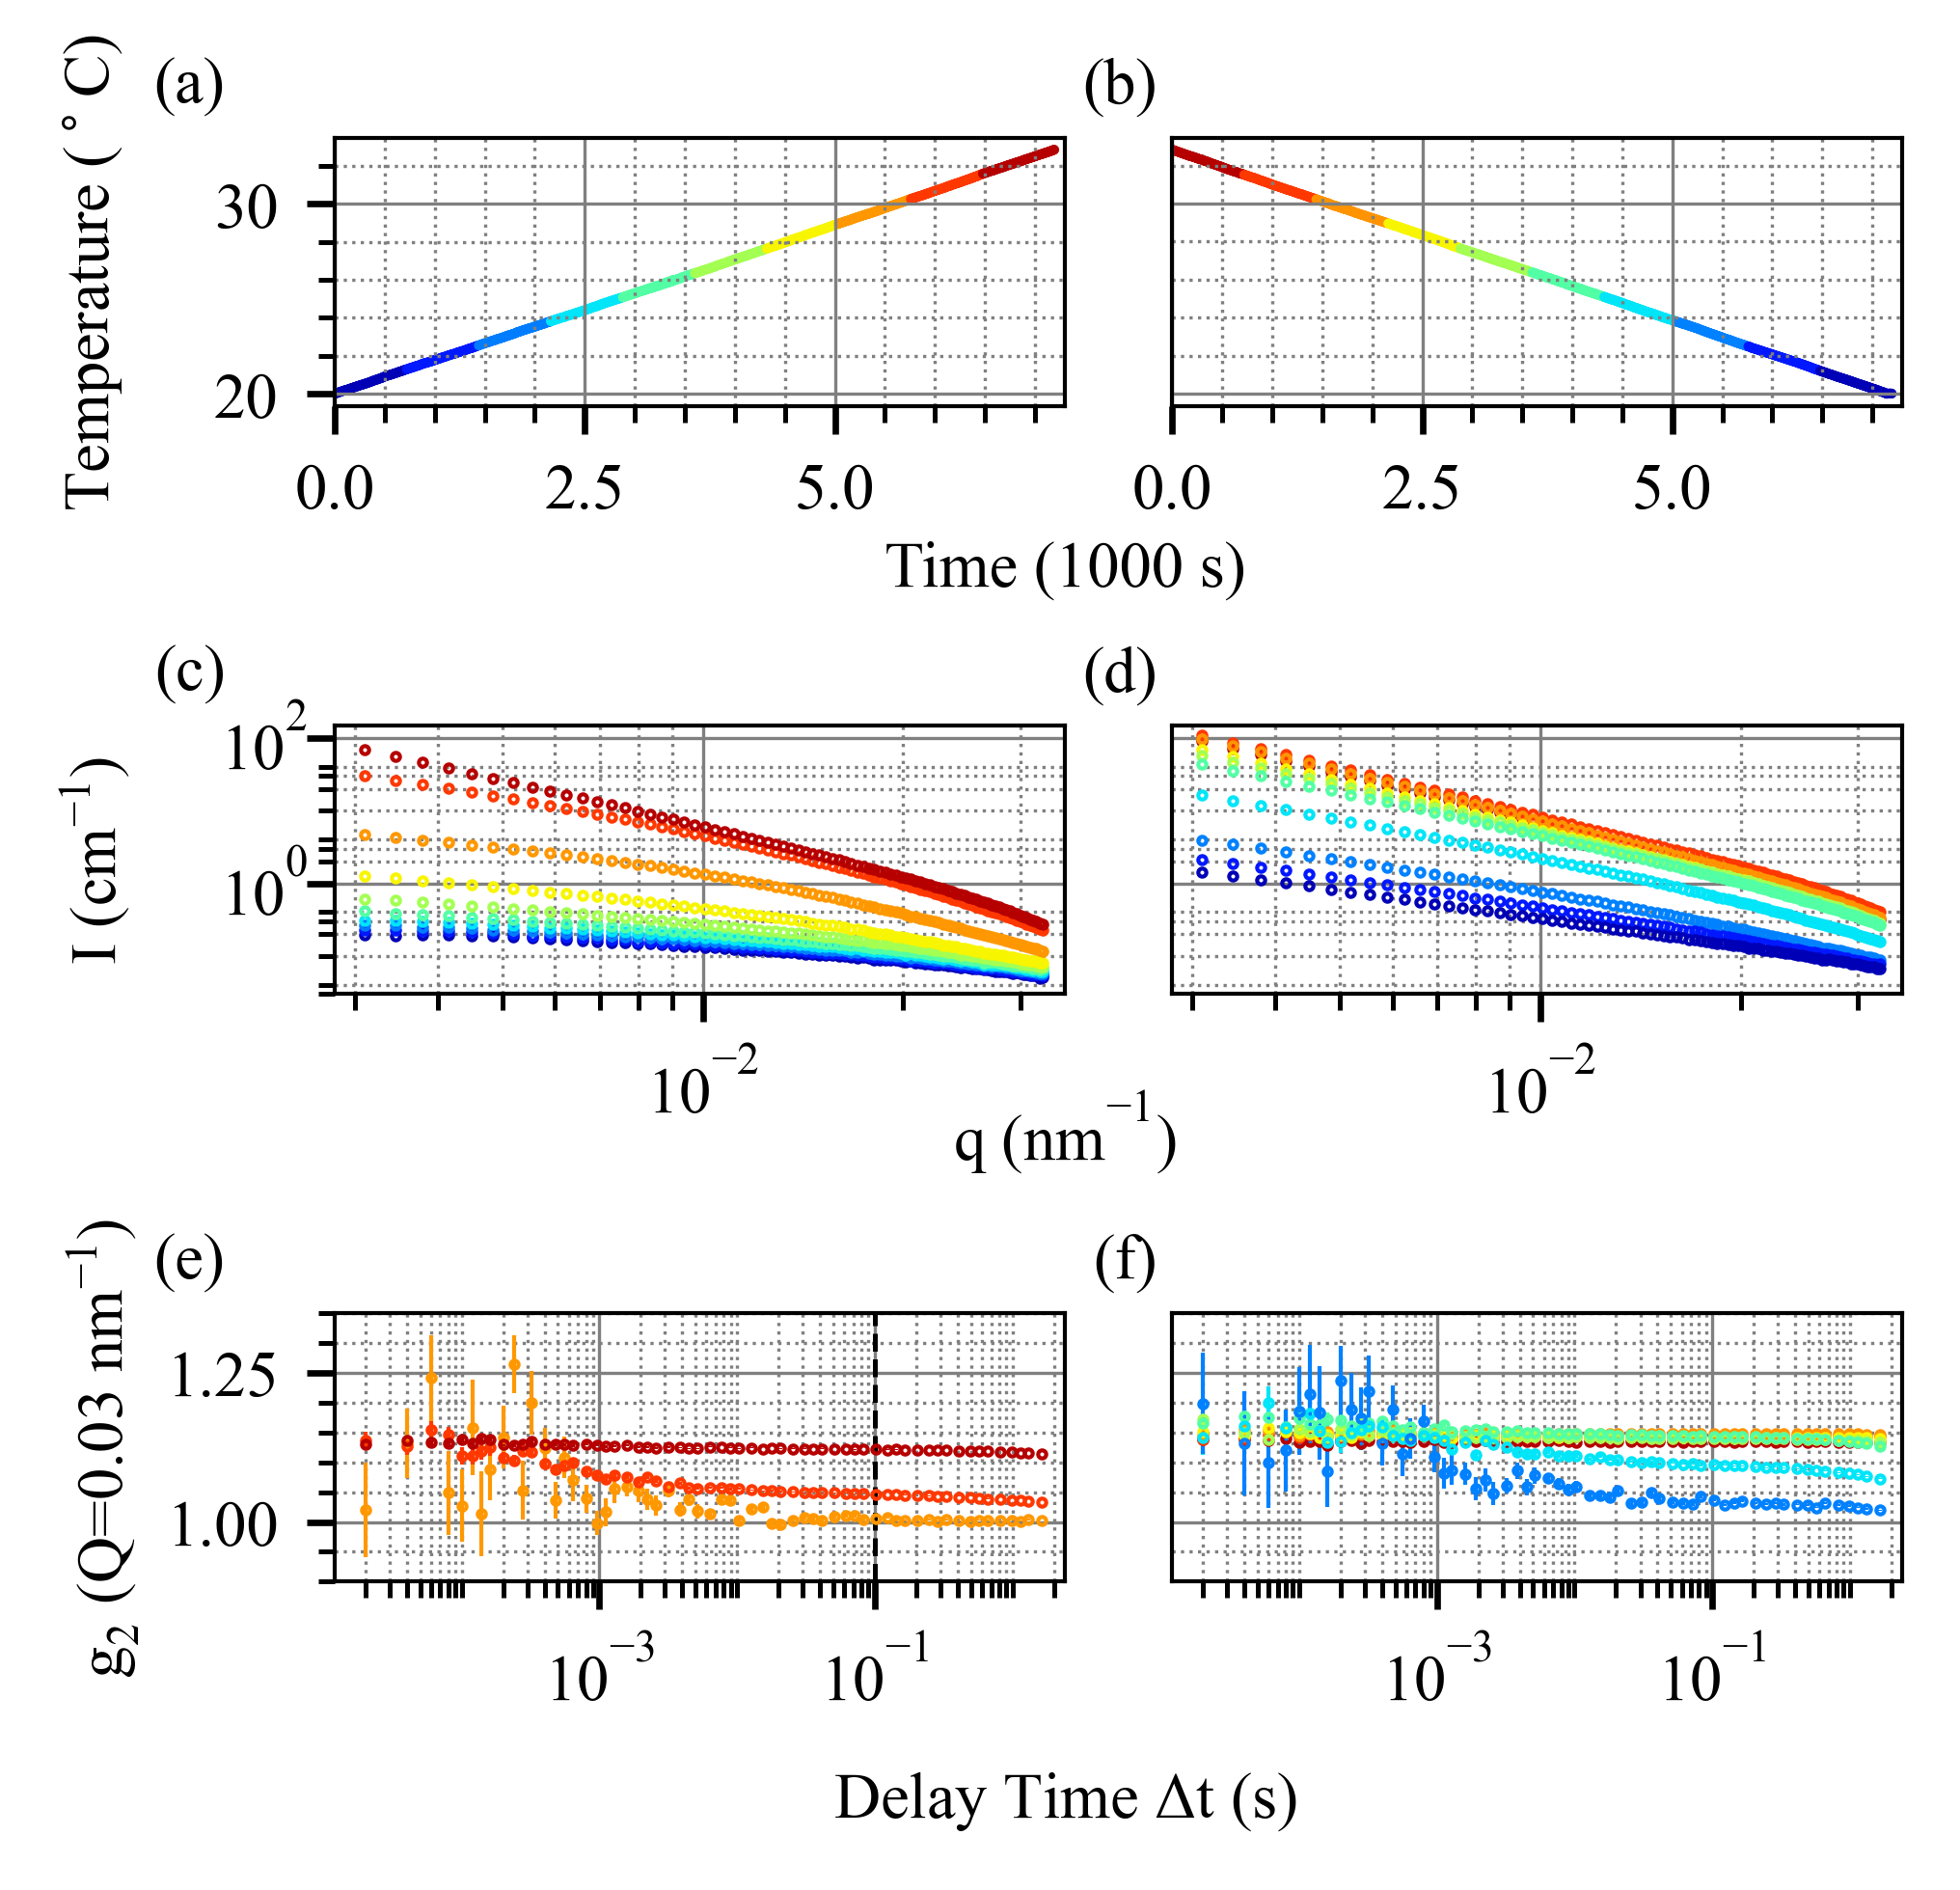

In [6]:
with open('checkpoint.pickle', 'rb') as f: 
    avg_ramp_up = pickle.load(f)  # Load the object from the file
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600

# Calculate figure width to achieve 86 mm width
figure_width_mm = 86
figure_width_inches = figure_width_mm / 25.4  # Convert mm to inches
fig, ax = plt.subplots(3, 2, figsize=(figure_width_inches, figure_width_inches * 4.0 / 3.8))


def plot_one_column(ax, avg_data_list, second_column=False, g2_idx=0):
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    if second_column:
        cmap = plt.get_cmap('jet_r')
    else:
        cmap = plt.get_cmap('jet')
    
    accu_size = 0
    for avg_dict in avg_data_list:
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size

        ax[0].scatter(avg_dict['temperature_x'] * 6 / 1000, avg_dict['temperature'], 
                      c=cmap(np.ones_like(idx)*np.mean(idx)), s=0.5, linewidth=0.5)

        color = cmap(np.mean(idx))
        for i in range(len(ql_sta[:-15])):
            if i % 3 == 0:  # Plot every third marker
                ax[1].loglog(ql_sta[i], avg_dict['saxs_1d'][i], 'o-', color=color, lw=0.5, ms=1, mew=0.5, mfc='none')
 
        
        g2_line = avg_dict['g2'][:, g2_idx]
        
        if np.sum((g2_line > 1.25) | (g2_line < 1.0)) < 5:
            ax[2].errorbar(t_el, avg_dict['g2'][:, g2_idx], yerr=avg_dict['g2_err'][:, g2_idx], fmt='o', color=color, lw=0.5, ms=1, mew=0.5, mfc='none')
    ax[2].set_ylim(0.9, 1.35)
            
    # ax[2].set_ylim(-0.2,2.5)
    ax[2].set_xlim(0.000012,2.4)
    ax[0].set_xlim(0, 7.3)
    ax[1].set_xlim(2.8e-3, 3.5e-2)
    ax[2].set_xscale('log')
    ax[1].set_ylim(0.03, 150)
    
    if not second_column:
        ax[0].set_ylabel('Temperature ($^\circ$C)', fontname="Times New Roman", labelpad = 11)
        ax[1].set_ylabel('I (cm$^\mathdefault{{-1}}$)', fontname="Times New Roman", labelpad = 11)
        ax[2].set_ylabel('$\mathdefault{g_2}$ (Q=0.03 nm$^\mathdefault{{-1}}$)', fontname="Times New Roman", labelpad = 3)
        plt.subplots_adjust(left=0.15)

        ax[0].set_xlabel('Time (1000 s)', fontname="Times New Roman")
        ax[1].set_xlabel('q ($\mathdefault{nm^{-1}}$)', fontname="Times New Roman")
        ax[2].set_xlabel('Delay Time $\mathdefault{\Delta t}$ (s)', fontname="Times New Roman")
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.35)
        ax[2].xaxis.set_label_coords(1.0, -0.7)
        ax[2].axvline(x=0.1, color='black', linestyle='--', linewidth=0.6)

        # Add gray grid lines and minor ticks 
        ax[0].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[0].minorticks_on()
        ax[0].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        
        ax[1].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[1].minorticks_on()
        ax[1].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        # Add minor y ticks to the second row images
        ax[1].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10, subs=np.arange(1, 5) *1, numticks=4))
        ax[1].tick_params(axis='y', which='minor', left=True, right=False, labelleft=False)
        ax[1].set_yticklabels(ax[1].get_yticklabels(), ha='left', x=-0.08)

        ax[2].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[2].minorticks_on()
        ax[2].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')

        ax[2].set_xscale('log')
        ax[2].xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10), numticks=100))

        ax[2].tick_params(axis='x', which='minor', labelbottom=False)

        plt.subplots_adjust(left=0.15, right=0.95, bottom=0.2, top=0.9)
        
    if second_column:
        ax[0].set_xlim(0, 7.3)
        ax[1].set_xlim(2.8e-3, 3.5e-2)
        ax[1].set_ylim(0.03, 150)
        ax[2].set_ylim(0.9, 1.35)
        ax[2].set_xlim(0.000012,2.4)
        
        # Add gray grid lines and minor ticks for the second column 
        ax[0].tick_params(axis='y', labelleft=False)
        ax[1].tick_params(axis='y', labelleft=False)
        ax[2].tick_params(axis='y', labelleft=False)

        ax[0].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[0].minorticks_on()
        ax[0].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[1].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[1].minorticks_on()
        ax[1].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[1].yaxis.set_minor_locator(matplotlib.ticker.LogLocator(base=10, subs=np.arange(1, 5) * 1, numticks=4))

        ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[2].grid(which='major', linestyle='-', linewidth='0.4', color='gray')
        ax[2].minorticks_on()
        ax[2].grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
        ax[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        ax[2].set_xscale('log')
        ax[2].xaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 10), numticks=100))

        ax[2].tick_params(axis='x', which='minor', labelbottom=False)

# Adjusted w_pad for better layout
plt.tight_layout(w_pad=-1, h_pad=4.0)

plot_one_column(ax[:, 0], avg_ramp_up)
plot_one_column(ax[:, 1], avg_ramp_down, second_column=True)
for a in ax.flatten():
    a.spines['top'].set_linewidth(0.5)
    a.spines['right'].set_linewidth(0.5)
    a.spines['bottom'].set_linewidth(0.5)
    a.spines['left'].set_linewidth(0.5)

# Add labels (a) to (f)
ax[0, 0].text(-0.15, 1.3, '(a)', transform=ax[0, 0].transAxes, fontsize=8, va='top', ha='right')
ax[1, 0].text(-0.15, 1.3, '(c)', transform=ax[1, 0].transAxes, fontsize=8, va='top', ha='right')
ax[2, 0].text(-0.15, 1.3, '(e)', transform=ax[2, 0].transAxes, fontsize=8, va='top', ha='right')

ax[0, 1].text(-0.02, 1.3, '(b)', transform=ax[0, 1].transAxes, fontsize=8, va='top', ha='right')
ax[1, 1].text(-0.02, 1.3, '(d)', transform=ax[1, 1].transAxes, fontsize=8, va='top', ha='right')
ax[2, 1].text(-0.02, 1.3, '(f)', transform=ax[2, 1].transAxes, fontsize=8, va='top', ha='right')

plt.savefig('H06.pdf')

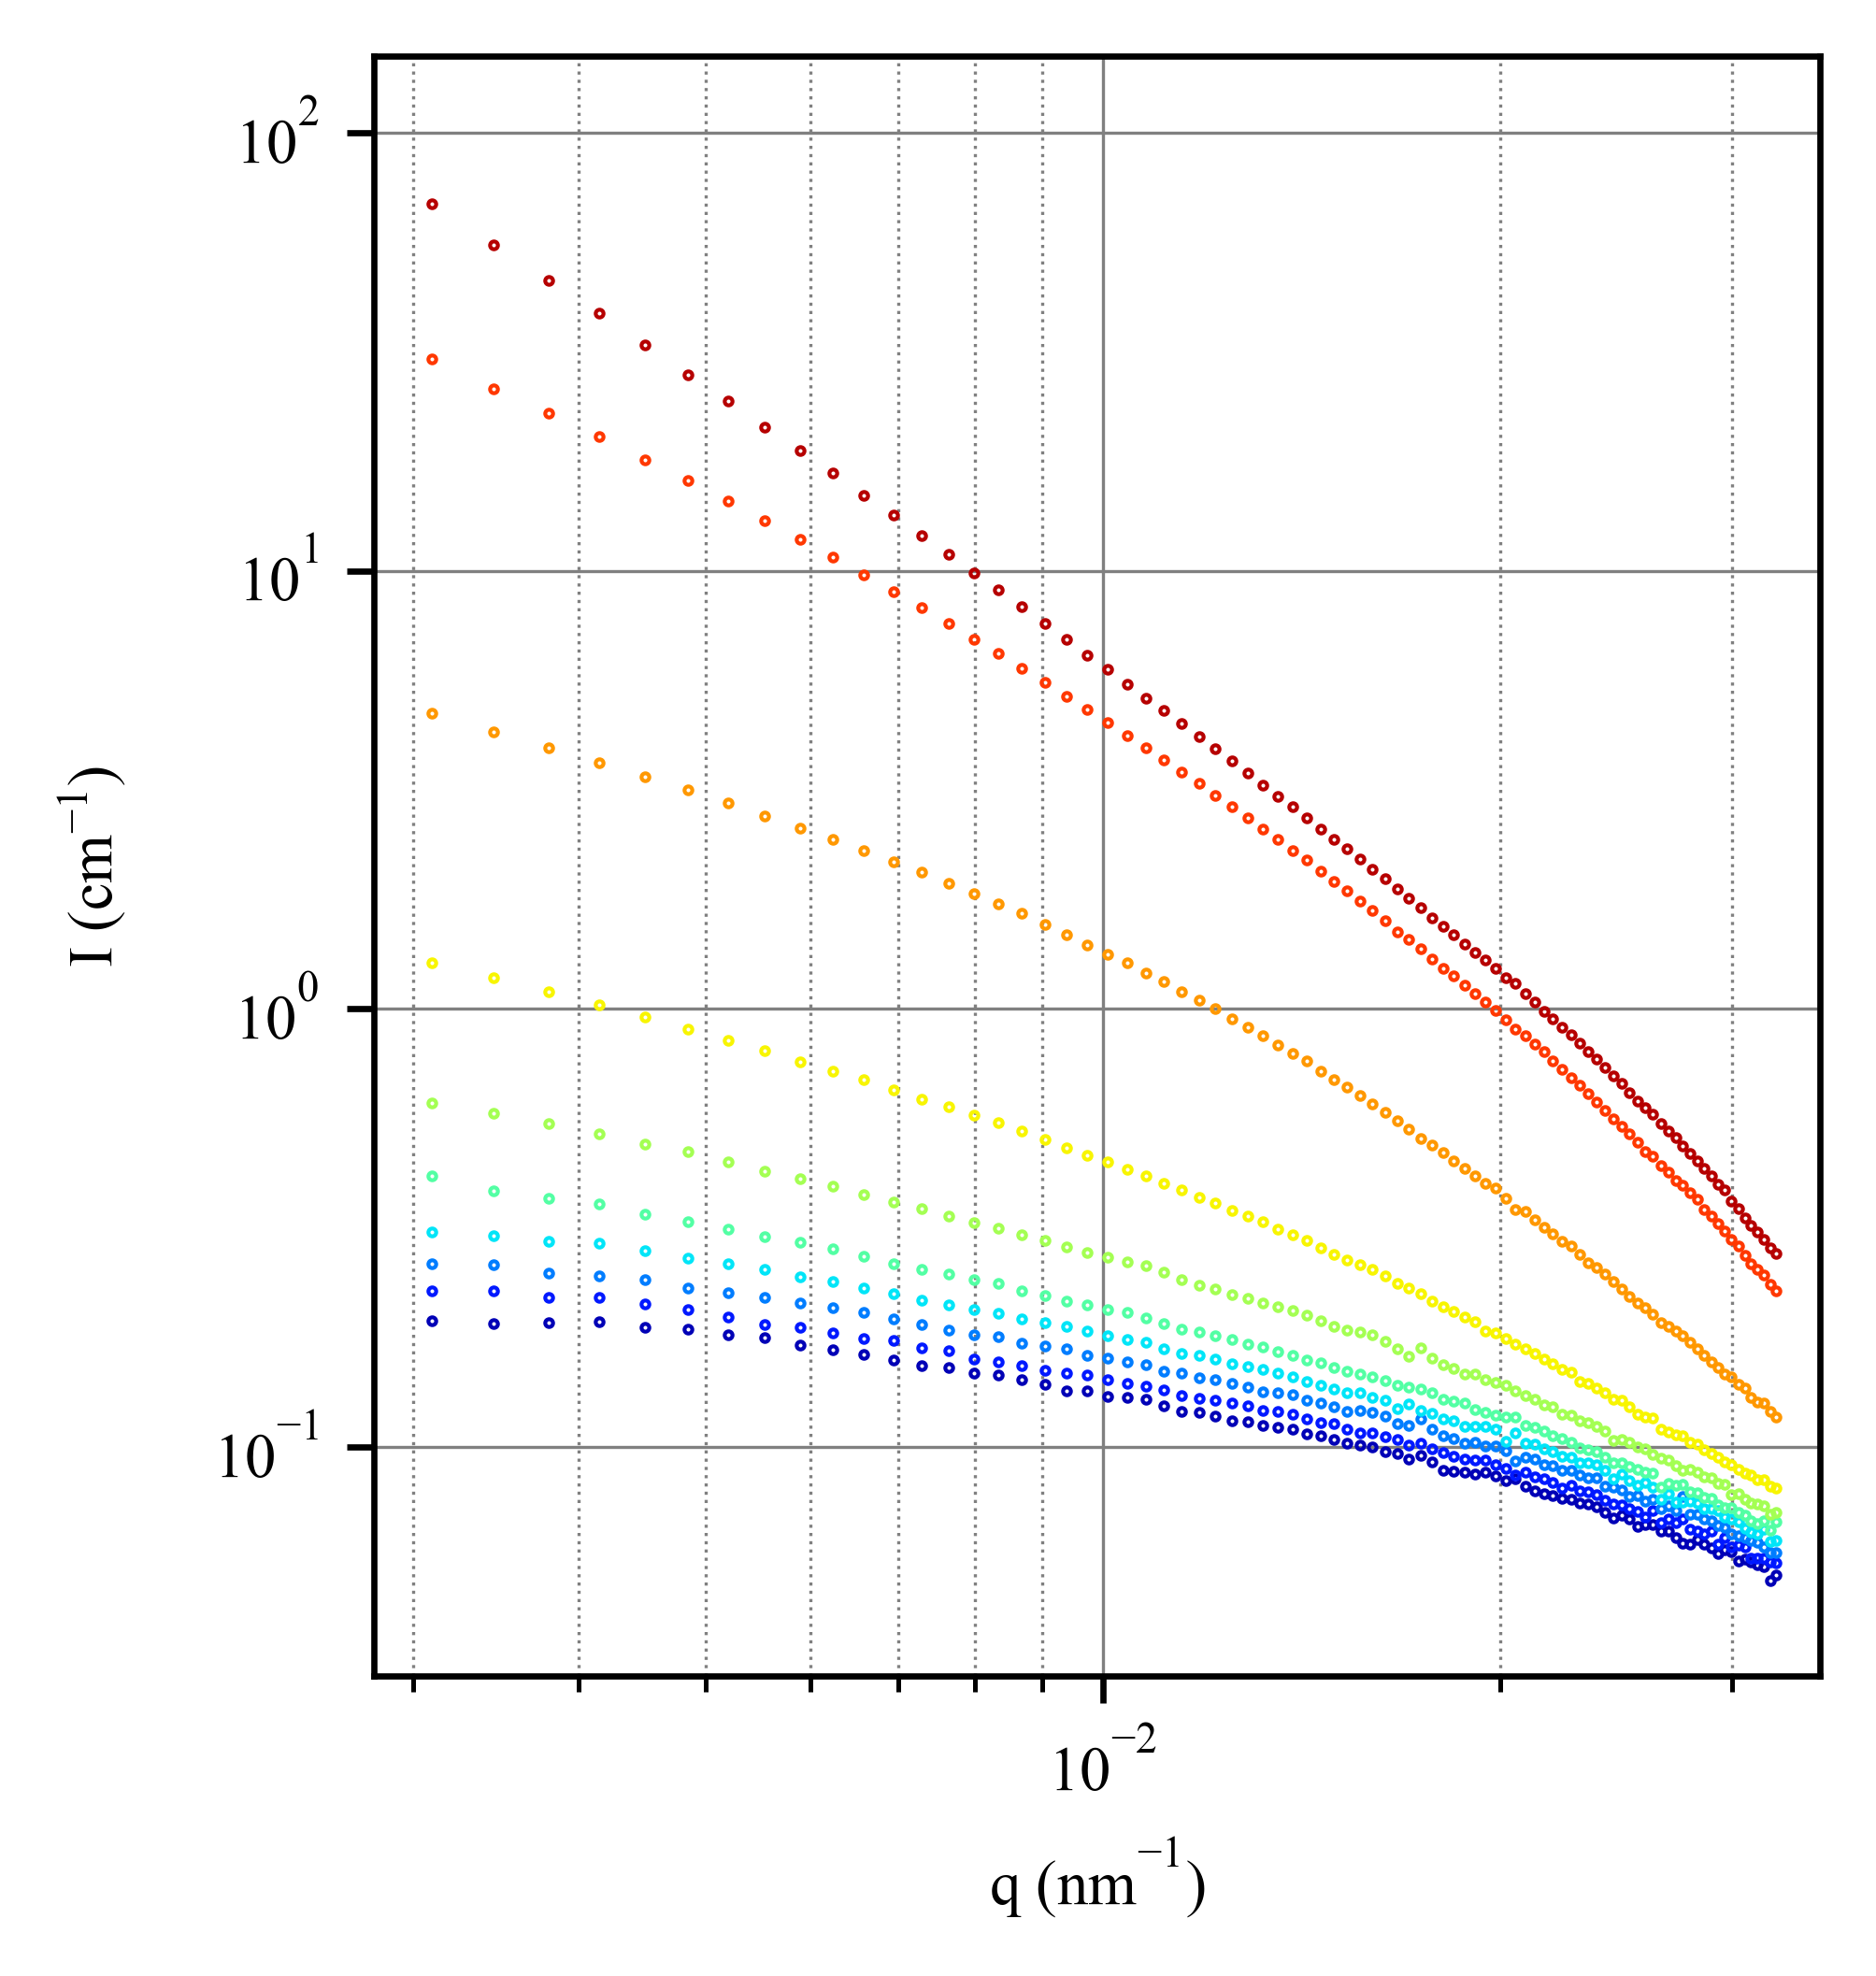

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

with open('checkpoint.pickle', 'rb') as f: 
    avg_ramp_up = pickle.load(f)  # Load the object from the file
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600

# Calculate figure width to achieve 86 mm width
figure_width_mm = 86
figure_width_inches = figure_width_mm / 25.4  # Convert mm to inches

fig, ax = plt.subplots(figsize=(figure_width_inches, figure_width_inches * 4.0 / 3.8))

def plot_subfigure_c(ax, avg_data_list):
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    cmap = plt.get_cmap('jet')
    accu_size = 0
    for avg_dict in avg_data_list:
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size

        color = cmap(np.mean(idx))
        for i in range(len(ql_sta[:-15])):
            if i % 3 == 0:  # Plot every third marker
                ax.loglog(ql_sta[i], avg_dict['saxs_1d'][i], 'o-', color=color, lw=0.5, ms=1, mew=0.5, mfc='none')
    
    ax.set_xlim(2.8e-3, 3.5e-2)
    ax.set_ylim(0.03, 150)
    ax.set_ylabel('I (cm$^\mathdefault{-1}$)', fontname="Times New Roman", labelpad=11)
    ax.set_xlabel('q ($\mathdefault{nm^{-1}}$)', fontname="Times New Roman")
    ax.grid(which='major', linestyle='-', linewidth='0.4', color='gray')
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
    ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 5) * 1, numticks=4))

plot_subfigure_c(ax, avg_ramp_up)

plt.tight_layout()
plt.savefig('subfigure_C.pdf')


NameError: name 'q_scale_green' is not defined

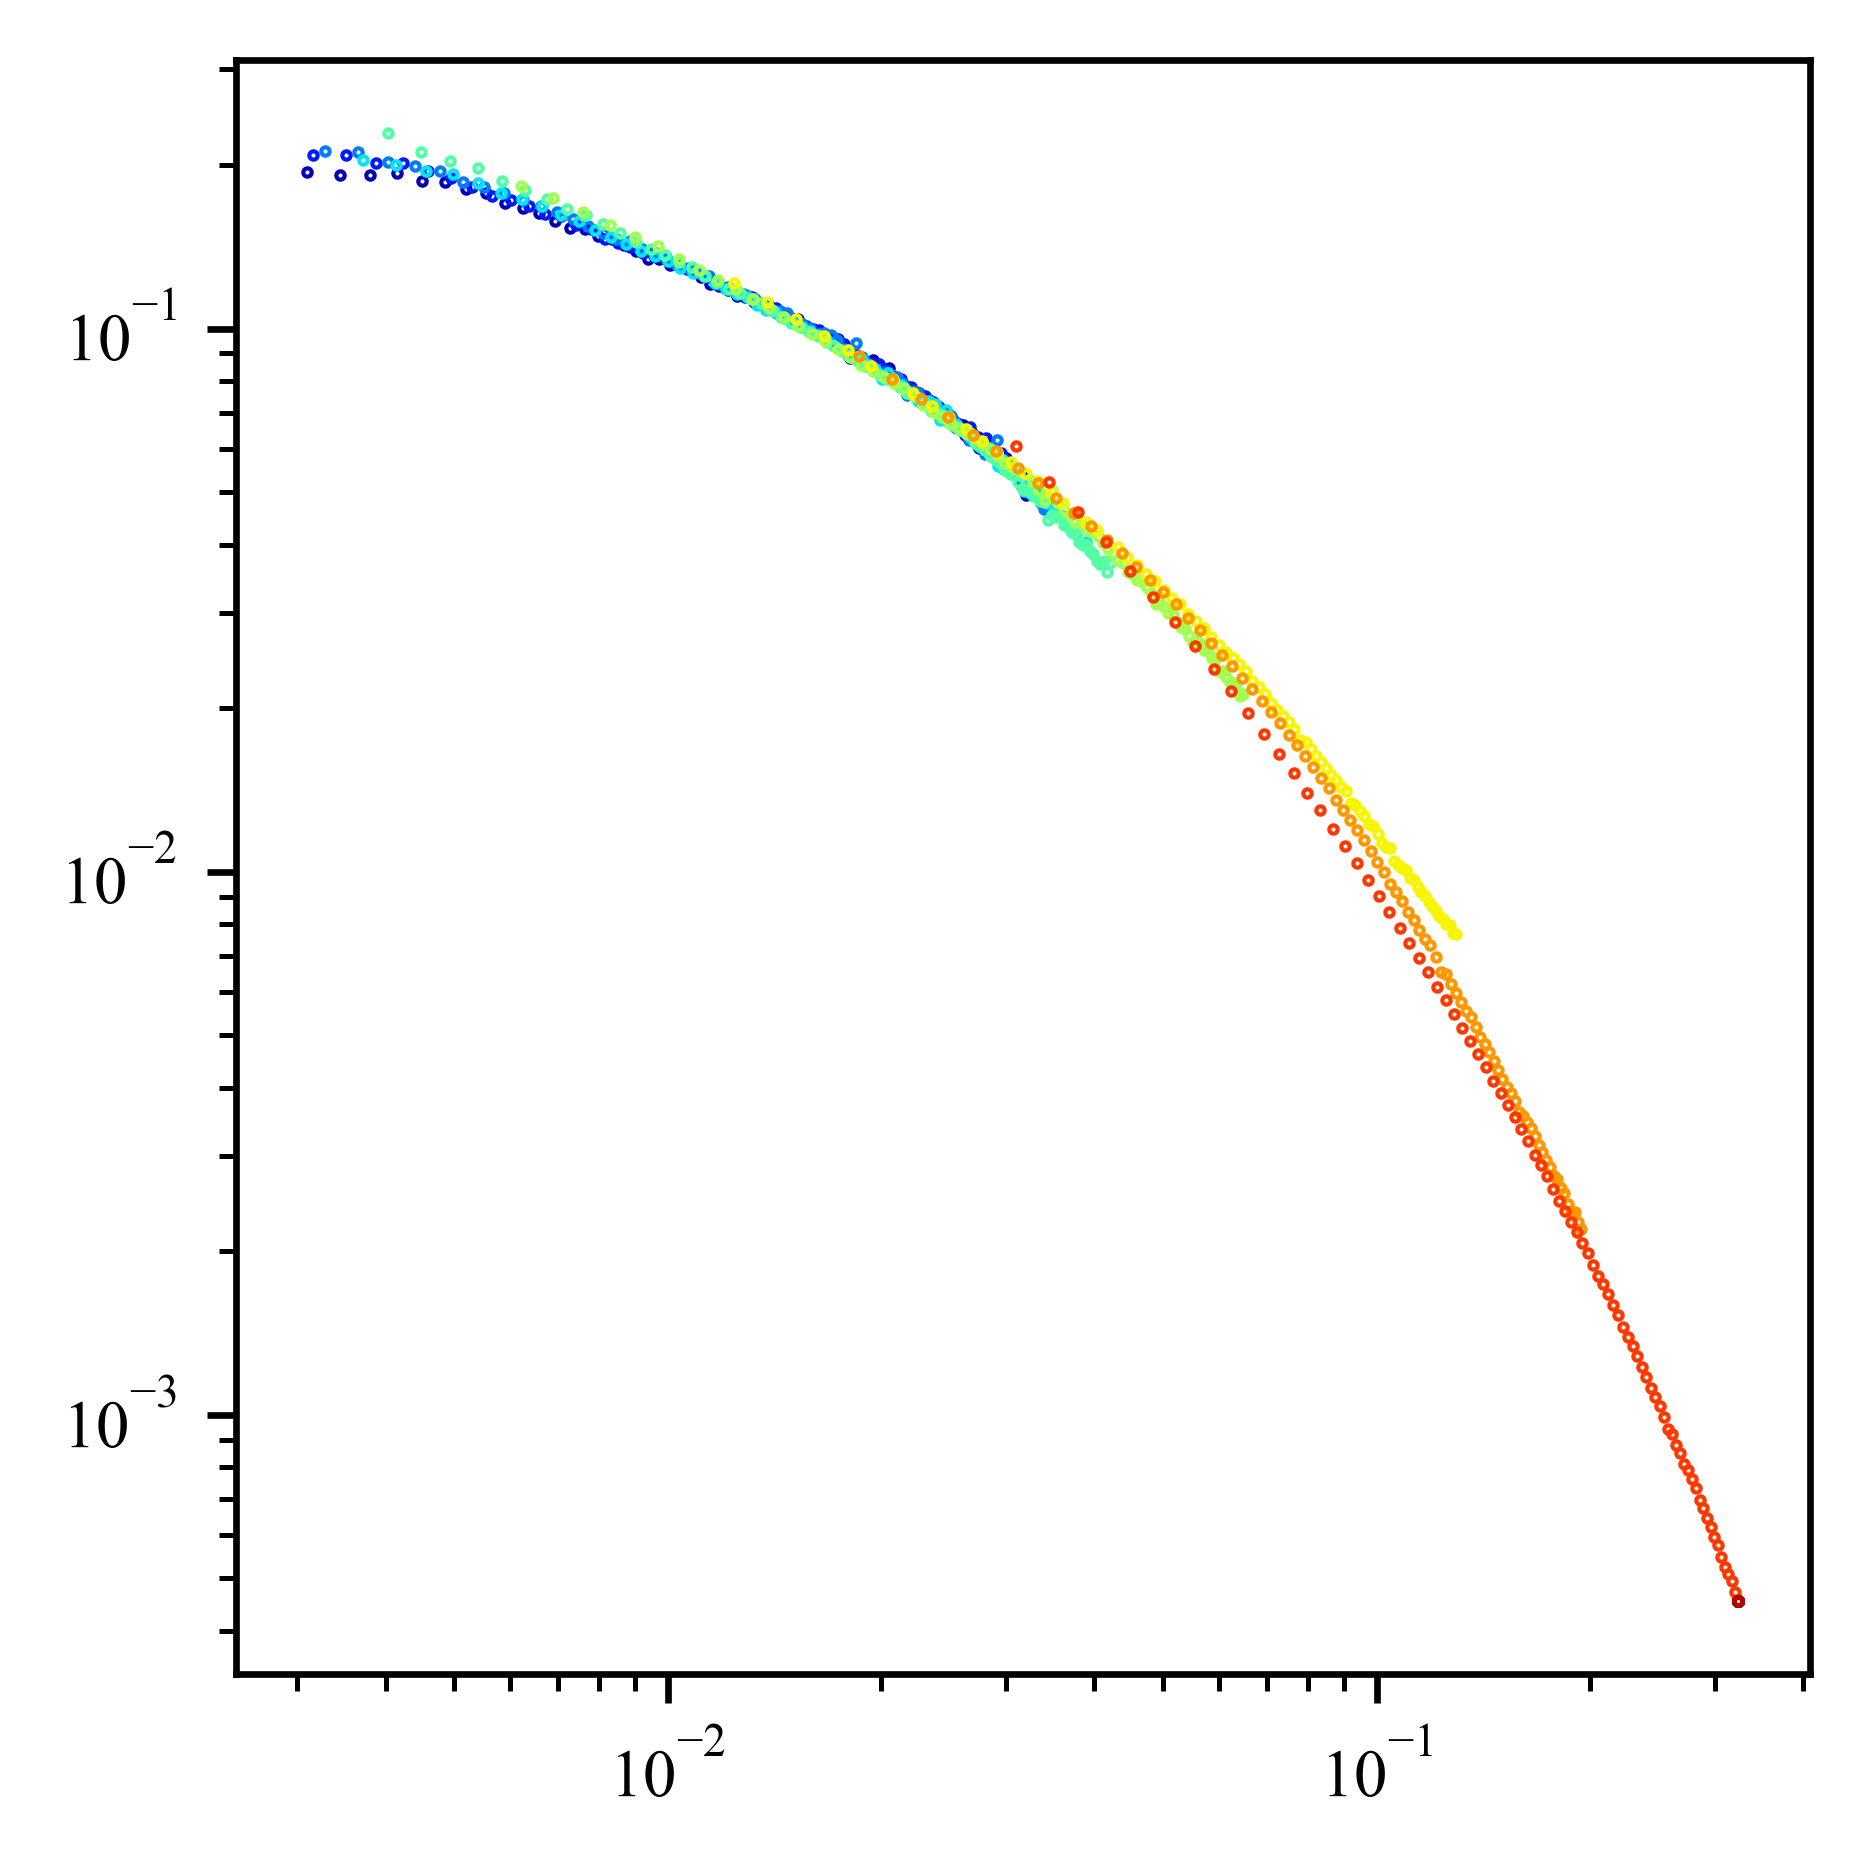

In [24]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


with open('checkpoint.pickle', 'rb') as f: 
    avg_ramp_up = pickle.load(f)  # Load the object from the file
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 600

# Calculate figure width to achieve 86 mm width
figure_width_mm = 86
figure_width_inches = figure_width_mm / 25.4  # Convert mm to inches

fig, ax = plt.subplots(figsize=(figure_width_inches, figure_width_inches * 4.0 / 3.8))

def plot_subfigure_c(ax, avg_data_list, ql_sta):
    # Scaling coefficients for specific curves
    i_scale_1 = 0.92  
    q_scale_1 = 1.02  
    i_scale_2 = 0.81  
    q_scale_2 = 1.06  
    i_scale_3 = 0.66  
    q_scale_3 = 1.2  
    i_scale_4 = 0.55  
    q_scale_4 = 1.3  
    i_scale_5 = 0.3 
    q_scale_5 = 2 
    i_scale_6 = 0.095  
    q_scale_6 = 4 
    i_scale_7 = 0.0188 
    q_scale_7 = 6 
    i_scale_8 = 0.002 
    q_scale_8 = 10 
    
    total_size = 0
    for avg_dict in avg_data_list:
        total_size += len(avg_dict['temperature_x'])

    cmap = plt.get_cmap('jet')
    accu_size = 0
    for idx_curve, avg_dict in enumerate(avg_data_list):
        curr_size = len(avg_dict['temperature_x'])
        idx = accu_size + np.arange(curr_size) * 1.0
        idx /= total_size
        accu_size += curr_size

        color = cmap(np.mean(idx))

        for i in range(len(ql_sta[:-15])):
            if i % 3 == 0:  # Plot every third marker
                # Apply scaling based on curve index
                if idx_curve == 0:  # Blue curve (lowest temperature)
                    q_scaled = ql_sta[i]
                    i_scaled = avg_dict['saxs_1d'][i]
                elif idx_curve == 1:  
                    q_scaled = ql_sta[i] * q_scale_1
                    i_scaled = avg_dict['saxs_1d'][i] * i_scale_1
                elif idx_curve == 2:  
                    q_scaled = ql_sta[i] * q_scale_2
                    i_scaled = avg_dict['saxs_1d'][i] * i_scale_2
                elif idx_curve == 3:  
                    q_scaled = ql_sta[i] * q_scale_3
                    i_scaled = avg_dict['saxs_1d'][i] * i_scale_3
                elif idx_curve == 4:  
                    q_scaled = ql_sta[i] * q_scale_4
                    i_scaled = avg_dict['saxs_1d'][i] * i_scale_4
                elif idx_curve == 5:  
                    q_scaled = ql_sta[i] * q_scale_5
                    i_scaled = avg_dict['saxs_1d'][i] * i_scale_5
                elif idx_curve == 6:  
                    q_scaled = ql_sta[i] * q_scale_6
                    i_scaled = avg_dict['saxs_1d'][i] * i_scale_6
                elif idx_curve == 7:  
                    q_scaled = ql_sta[i] * q_scale_7
                    i_scaled = avg_dict['saxs_1d'][i] * i_scale_7
                elif idx_curve == 8:  
                    q_scaled = ql_sta[i] * q_scale_8
                    i_scaled = avg_dict['saxs_1d'][i] * i_scale_8
                    
                ax.loglog(q_scaled, i_scaled, 'o-', color=color, lw=0.5, ms=1, mew=0.5, mfc='none')
    
    ax.set_xlim(2.8e-3, 5e-1 * q_scale_green)
    ax.set_ylim(0.03 * -0.02, 150)
    ax.set_ylabel('I (cm$^\mathdefault{-1}$)', fontname="Times New Roman", labelpad=11)
    ax.set_xlabel('q ($\mathdefault{nm^{-1}}$)', fontname="Times New Roman")
    ax.grid(which='major', linestyle='-', linewidth='0.4', color='gray')
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.4', color='gray')
    ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(1, 5) * 1, numticks=4))
    


plot_subfigure_c(ax, avg_ramp_up, ql_sta)

plt.tight_layout()
plt.savefig('subfigure_C_scaled_specific.pdf')


In [23]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load the data
with open('checkpoint.pickle', 'rb') as f:
    avg_ramp_up = pickle.load(f)
    avg_ramp_down = pickle.load(f)
    t_el = pickle.load(f)
    ql_sta = pickle.load(f)
    ql_dyn = pickle.load(f)
    
# Define the chi-squared metric for direct comparison
def chi_squared_direct(q_scale, i_scale, ref_x, ref_y, target_x, target_y):
    """
    Calculate chi-squared directly comparing the reference curve with the scaled target curve.
    Formula: chi^2 = sum((O - E)^2 / E)
    """
    # Scale the target curve
    target_x = np.log10(target_x[:-20])
    target_y = np.log10(target_y[:-20])
    ref_x = np.log10(ref_x[:-20])
    ref_y= np.log10(ref_y[:-20])


    scaled_x = target_x + np.log10(q_scale)
    scaled_y = target_y + np.log10(i_scale)

    for index,x in enumerate(scaled_x):
        if x > np.max(target_x):
            break
        # min_num_index = np.argmin(np.abs(x-ref_x))
    ref_y_inter= np.interp(scaled_x,ref_x,ref_y)
    chi2 = np.sum(((scaled_y - ref_y_inter)**2)
    chi2 = chi2+((scaled_y[index]-ref_y[index])**2)


#         # Calculate chi-squared for y-alignment
#         chi2_y = np.sum(((ref_y - scaled_y) ** 2) / scaled_y)

    return chi2

# Iterate over a range of multipliers to compute chi-squared
def iterate_chi_squared_direct(avg_data_list, ql_sta):
    """
    Iterate over q_scale and i_scale multipliers and compute chi-squared values for direct comparison.
    """
    ref_x = ql_sta
    ref_y = avg_data_list[0]['saxs_1d']  # First curve is the reference

    chi2_results = []

    # Define the ranges for q_scale and i_scale
    q_scale_range = np.arange(0.5, 1.5, 0.01)  # Increment by 0.1
    i_scale_range = np.arange(0.5, 1.5, 0.01)  # Increment by 0.1

    # Use only the first two curves
    target_x = ql_sta
    target_y = avg_data_list[1]['saxs_1d']  # Second curve

    for q_scale in q_scale_range:
        for i_scale in i_scale_range:
            
            chi2 = chi_squared_direct(q_scale, i_scale, ref_x, ref_y, target_x, target_y)
            chi2_results.append((1, q_scale, i_scale, chi2))

    return chi2_results

# Run the chi-squared iteration and save results
chi2_results = iterate_chi_squared_direct(avg_ramp_up, ql_sta)
# plt.plot(chi2_results)

# Find the minimum chi-squared result
min_chi2_result = min(chi2_results, key=lambda x: x[3])

# Save results to a file
with open('chi2_results.txt', 'w') as f:
    for result in chi2_results:
        f.write(f"Curve {result[0]}: q_scale={result[1]:.4f}, i_scale={result[2]:.4f}, chi2={result[3]:.4f}\n")

# Print the minimum chi-squared result
print(f"Minimum chi-squared: Curve {min_chi2_result[0]}, q_scale={min_chi2_result[1]:.4f}, i_scale={min_chi2_result[2]:.4f}, chi2={min_chi2_result[3]:.4f}")


# Plot the first two curves with the best-fit multipliers
fig, ax = plt.subplots(figsize=(6, 4))

# Reference curve (first curve)
ref_x = ql_sta
ref_y = avg_ramp_up[0]['saxs_1d']
ax.loglog(ref_x, ref_y, label='Reference Curve', marker='o', linestyle='-', markersize=3)

# Target curve (second curve), scaled with the best-fit multipliers
target_x = ql_sta
target_y = avg_ramp_up[1]['saxs_1d']
best_q_scale = min_chi2_result[1]
best_i_scale = min_chi2_result[2]
scaled_x = target_x * best_q_scale
scaled_y = target_y * best_i_scale
ax.loglog(scaled_x, scaled_y, label='Scaled Target Curve', marker='o', linestyle='-', markersize=3)

# Add plot labels and legend
ax.set_xlabel('q ($\mathdefault{nm^{-1}}$)', fontsize=12)
ax.set_ylabel('I (cm$^\mathdefault{-1}$)', fontsize=12)
ax.set_title('Best-Fit Curve Alignment Direct Comparison', fontsize=14)
ax.legend()
ax.grid(which='both', linestyle='--', linewidth=0.5)

# Save and show the plot
plt.tight_layout()
plt.savefig('best_fit_alignment_direct_plot.pdf')
plt.show()
# print(ref_y)
# print(ql_sta[:10])
# print(1.2*ql_sta[:10])

SyntaxError: invalid syntax (3236110387.py, line 35)